In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.fftpack import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


In [5]:
parent_dir = 'C:\\Users\\prith\\Downloads\\dataonly'
files = ['akshay1.csv', 'akshay2.csv', 'akshay3.csv', 'Chaitanya1.csv', 'Chaitanya2.csv', 'Chaitanya3.csv',
         'Hitarth1.csv', 'Hitarth2.csv', 'Hitarth3.csv', 'shivang51.csv', 'shivang52.csv', 'shivang53.csv',
         'shruti1.csv', 'sparsh1.csv', 'sparsh2.csv', 'sparsh3.csv']
cols = ['Output1', 'Output2', 'Output3', 'Output4', 'var1', 'var2', 'var3', 'var4']


In [3]:
final_df = []
st_ind = ['start zero.png', 'start one.png', 'start two.jpg', 'start three.jpg', 'start four.jpg',
          'start five.jpg', 'start six.jpg', 'start seven.jpg', 'start eight.jpg', 'start nine.jpg', 'start animal.jpg']
end_ind = ['end zero.png', 'end one.png', 'end two.jpg', 'end three.jpg', 'end four.jpg',
           'end five.jpg', 'end six.jpg', 'end seven.jpg', 'end eight.jpg', 'end nine.jpg', 'end animal.jpg']


In [6]:
for name in files:
    file_path = os.path.join(parent_dir, name)
    df = pd.read_csv(file_path)
    df.columns = cols
    df = df.drop(cols[4:], axis=1)
    final_df1 = []

    for a, b in zip(st_ind, end_ind):
        start_idx = df[df['Output1'] == a].index
        end_idx = df[df['Output1'] == b].index
        temp_df1 = []

        for i, j in zip(start_idx, end_idx):
            row = df.iloc[i + 1:j]
            temp_df1.append(row)

        merged_df1 = pd.concat(temp_df1, ignore_index=True, sort=False)
        merged_df1 = merged_df1.reset_index(drop=True)
        final_df.append(merged_df1)

In [7]:
lengths = [len(a) for a in final_df]
med = int(np.median(lengths))

In [8]:
def resample_array(array, target_length):
    input_indices = np.linspace(0, len(array) - 1, len(array))
    resampled_indices = np.linspace(0, len(array) - 1, target_length)
    interpolator = interp1d(input_indices, array, kind='linear')
    return interpolator(resampled_indices)

In [9]:
resampled_data = []
target_var = []

for i, dff in enumerate(final_df):
    resampled_segment = {}
    for col in cols[:4]:
        val = dff[col].values
        resampled_segment[col] = resample_array(val, med)
    resampled_data.append(pd.DataFrame(resampled_segment))
    target_var.append(0 if i % 11 == 0 else 1)

In [10]:
def apply_fft(segment):
    fft_features = []
    for col in cols[:4]:
        fft_vals = np.abs(fft(segment[col].values))[:med // 2]
        fft_features.extend(fft_vals)
    return fft_features

X = np.array([apply_fft(segment) for segment in resampled_data])
y = np.array(target_var)

In [11]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
model = models.Sequential()
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(y_categorical.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\prith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.5889 - loss: 18045502.0000 - val_accuracy: 0.9444 - val_loss: 758937.6250
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.8846 - loss: 3362381.5000 - val_accuracy: 0.9444 - val_loss: 615542.8750
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9016 - loss: 1484604.3750 - val_accuracy: 0.9444 - val_loss: 265834.0312
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8791 - loss: 631503.6875 - val_accuracy: 0.7222 - val_loss: 28349.7324
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8790 - loss: 146292.3594 - val_accuracy: 0.9444 - val_loss: 55486.1484
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7579 - loss: 184519.1875 - val_accuracy: 0.9444 - val_loss: 16241.0078
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8781 - loss: 76644.8203 - val_accuracy: 0.6389 - val_loss: 33240.5586
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9421 - loss: 9336.6768 
Test Accuracy: 0.9444


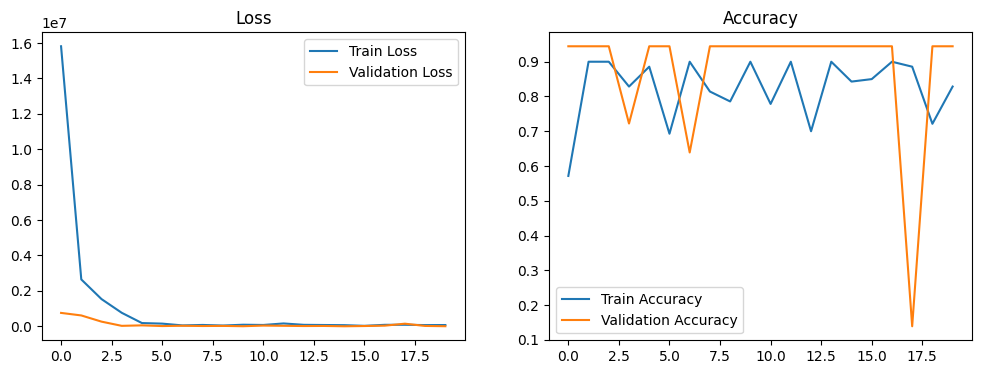

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()